# グラフで2バイト文字を使うためのライブラリのインストール

In [1]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=2e2170332d49cc6ff82b16548e37565b6d4fd619f77afdb52b60df40c28b1c60
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


# 実習6.1：クラスラベルからone-hotベクトルへの変換

In [3]:
import numpy as np

# 6個のデータ
# それぞれの要素はクラスラベル0, 1, 2のいずれか
a=np.array([0,1,2,0,2,1])

# データ数 x 3クラス用のone-hotベクトルを格納する2次元配列を生成
v=np.zeros((len(a),3))

N=len(a)
v[np.arange(N),a]=1

print(v)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


# 実習6.2：2次元配列からクラスラベルへの変換

In [4]:
# 4つのデータ
# 各行にクラス0, 1, 2である条件付き確率が格納されている
p=np.array([[0.1,0.8,0.1],
            [0.6,0.3,0.1],
            [0.0,0.0,1.0],
            [0.9,0.1,0.0]])

# 列方向に最大値を持つインデックスを求める
labels=np.argmax(p,axis=1)
print(labels)

[1 0 2 0]


# 関数 save_fig：図の保存用

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

def save_fig(plt, file_prefix):
    if file_prefix == '':
        return
    
    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches='tight', pad_inches = 0)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches = 0)

# 関数 show_data3：2次元3クラスデータの可視化

In [6]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

XY_MIN = None # プロットする範囲の最小値
XY_MAX = None # プロットする範囲の最大値

def show_data3(x, t, title='', show=True, file_prefix=''):
    """2次元3クラスデータを表示する。
    Args:
        x (ndarray):2次元配列。shape = (N, 2)
        t (ndarray):クラスラベル
        title (str): グラフのタイトル
        show (boolean): グラフ表示フラグ
        file_prefix (str): 保存時のファイル名プレフィックス
    """
    
    global XY_MIN
    global XY_MAX

    if t.ndim == 1: # クラスラベル
        t3 = t
    else: # one-hotベクトル
        t3 = t.argmax(axis=1)
    
    classes = list(set(t3))
    classes.sort()

    plt.figure(figsize=(7, 7))
    
    labels = ['改善(0)', '効果なし(1)', '悪化(2)']
    for l, c in zip(labels, classes):
        points = x[t3 == c]
        plt.plot(points[:, 0], points[:, 1], 
                 linestyle='none', markeredgecolor='black', 
                 marker='o', alpha=0.6, markersize=10, label=l)

    if XY_MIN is None:
        xmax = np.max(x[:, 0])
        xmin = np.min(x[:, 0])
        ymax = np.max(x[:, 1])
        ymin = np.min(x[:, 1])
        XY_MAX = int(max(xmax, ymax) + 1)
        XY_MIN = int(min(xmin, ymin) - 1)
    
    plt.xlim(XY_MIN, XY_MAX)
    plt.ylim(XY_MIN, XY_MAX)
    plt.xlabel('薬Aの服用量', fontsize=16)
    plt.ylabel('薬Bの服用量', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=16)
    plt.title(title, fontsize=18)
    
    save_fig(plt, file_prefix=file_prefix)
    if show:
        plt.show()

# 関数 show_decision_border：2次元データの分布と決定境界を表示する

In [7]:
Z_MIN = None # プロットする範囲の最小値
Z_MAX = None # プロットする範囲の最大値

def show_decision_border(model, x, t, title='', file_prefix=''):
    """2次元データの分布と決定境界を表示する。
    Args:
        model: (tf.keras.models.Model): 学習済みモデル
        x (ndarray):2次元配列。shape = (N, 2)
        t (ndarray):クラスラベル
        title (str): グラフのタイトル
        file_prefix (str): 保存時のファイル名プレフィックス
    """
    global Z_MIN
    global Z_MAX

    if t.ndim == 1: # クラスラベル
        t3 = t
    else: # one-hotベクトル
        t3 = t.argmax(axis=1)
    
    classes = list(set(t3))
    classes.sort()

    plt.figure(figsize=(7, 7))
    
    labels = ['改善(0)', '効果なし(1)', '悪化(2)']
    for l, c in zip(labels, classes):
        points = x[t3 == c]
        plt.plot(points[:, 0], points[:, 1], 
                 linestyle='none', markeredgecolor='black', 
                 marker='o', alpha=0.6, markersize=10, label=l)

    if Z_MIN is None:
        xmax = np.max(x[:, 0])
        xmin = np.min(x[:, 0])
        ymax = np.max(x[:, 1])
        ymin = np.min(x[:, 1])
        Z_MAX = int(max(xmax, ymax) + 1)
        Z_MIN = int(min(xmin, ymin) - 1)
    
    plt.xlim(Z_MIN, Z_MAX)
    plt.ylim(Z_MIN, Z_MAX)
    plt.xlabel('薬Aの服用量', fontsize=16)
    plt.ylabel('薬Bの服用量', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=16)
    plt.title(title, fontsize=18)
    
    xn = 100
    x0 = np.linspace(Z_MIN, Z_MAX, xn)
    x1 = np.linspace(Z_MIN, Z_MAX, xn)
    
    K = 3 # クラス数

    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((xn, xn, K))
    for i in range(xn):
        x_batch = np.stack([xx0[:, i], xx1[:, i]]).T
        wk = model.predict(x_batch, verbose=0)
        for j in range(K):
            y[:, i, j] = wk[:, j]
        
    for j in range(K):
        cont = plt.contour(xx0, xx1, y[:, :, j],
                           levels=(0.5, 0.9),
                           colors=['k', 'cornflowerblue'])
        cont.clabel(fmt='%1.1f', fontsize=12)
    
    plt.grid(True)
    
    save_fig(plt, file_prefix=file_prefix)

    plt.show()

# 実習6.3：2次元3クラスデータの読み込み

In [8]:
import pandas as pd

df=pd.read_csv('data6.csv')

df

,a,b,y
0,3.712763,0.553194,1
1,12.253824,5.803979,0
2,7.586193,13.760358,2
3,4.732597,7.155488,1
4,10.277549,8.820130,0
...,...,...,...
235,4.072808,5.962963,1
236,12.804683,3.630380,0
237,2.931514,6.363189,1
238,3.548805,2.233272,1


# 実習6.4：教師データの準備

データ数: 240
配列aの形状: (240,)
配列bの形状: (240,)
配列y0の形状: (240,)
xの形状: (2, 240)
xの形状: (240, 2)
yの形状: (240, 3)


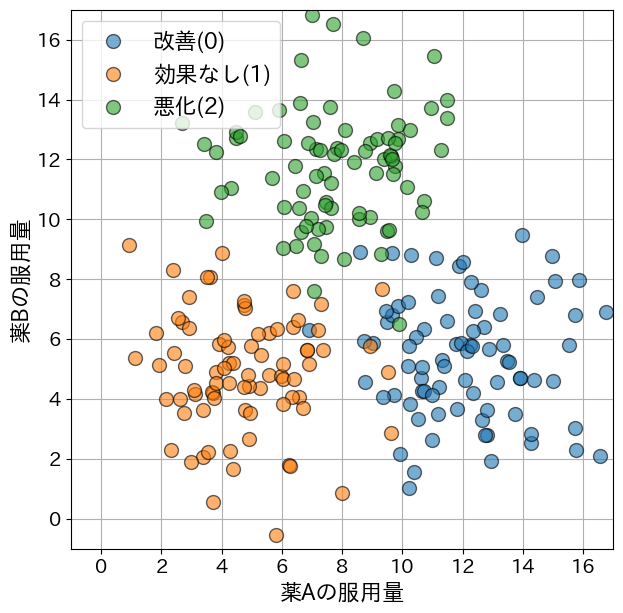

In [9]:
a=df['a'].to_numpy()
b=df['b'].to_numpy()
y0=df['y'].to_numpy()

print('データ数:', len(a))
print('配列aの形状:', a.shape)
print('配列bの形状:', b.shape)
print('配列y0の形状:', y0.shape)

# 配列aとbから2次元配列xを生成する
x=np.stack([a,b])
print('xの形状:', x.shape)

# 2行200列のデータを200行2列のデータにするため、xの転置をとる
x=x.T
print('xの形状:', x.shape)

# one-hotベクトルを格納する2次元配列を生成
n=len(x) # データ数
y=np.zeros((n,3))
print('yの形状:',y.shape)
y[np.arange(n),y0]=1

show_data3(x,y)

# 実習6.5：訓練データとテストデータに分割

訓練データxの形状: (168, 2)
訓練データyの形状: (168, 3)
テストデータxの形状: (72, 2)
テストデータyの形状: (72, 3)


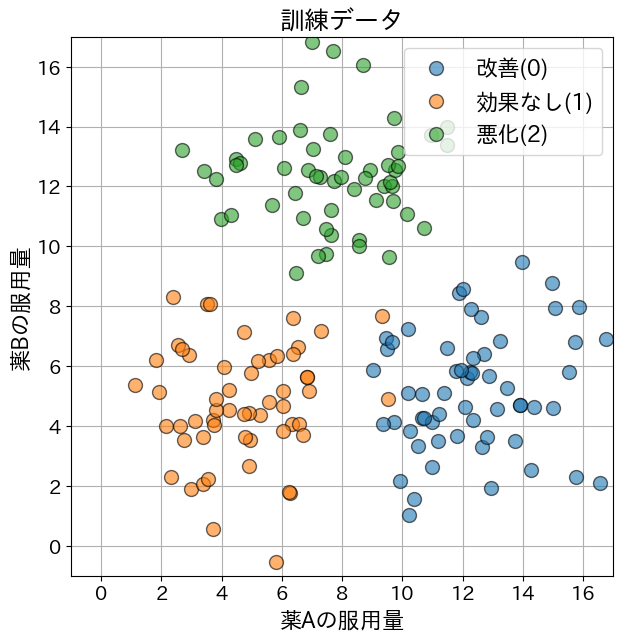

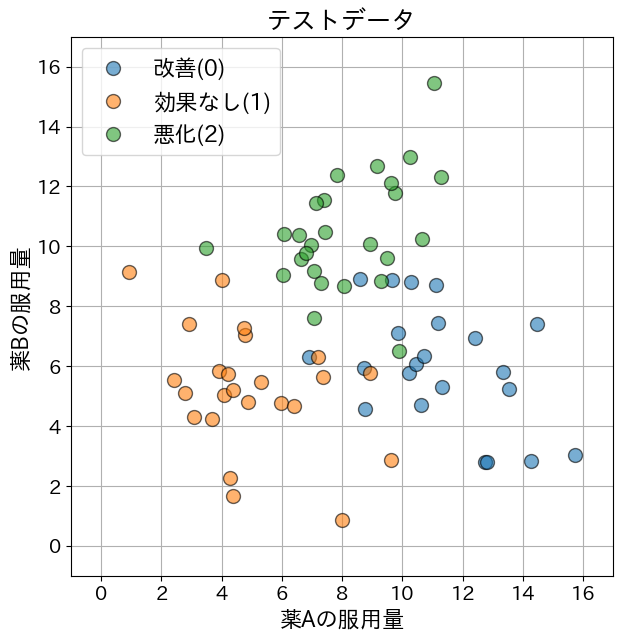

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,  # 入力データ
                                               y,  # 正解ラベル
                                               test_size=0.3, # 全データに対するテストデータの割合
                                               random_state=0) # 乱数シードを指定

print('訓練データxの形状:', x_train.shape)
print('訓練データyの形状:', y_train.shape)
print('テストデータxの形状:', x_test.shape)
print('テストデータyの形状:', y_test.shape)

# 訓練データの分布を表示
show_data3(x_train,y_train,title='訓練データ')

# テストデータの分布を表示
show_data3(x_test,y_test,title='テストデータ')

# 実習6.6：データの前処理

In [11]:
m=np.mean(x_train,axis=0) # 行方向に平均を計算
s=np.std(x_train,axis=0)  # 行方向に標準偏差を計算

print('訓練データの平均:', m)
print('訓練データの標準偏差:', s)

# 訓練データの平均と標準偏差で訓練データを標準化
z_train=(x_train-m)/s

# 訓練データの平均と標準偏差でテストデータを標準化
z_test=(x_test-m)/s

訓練データの平均: [8.2715628  7.34468245]
訓練データの標準偏差: [3.72576551 3.90851262]


# 実習6.7：ネットワークモデルの定義

In [12]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential() # ネットワークの容れ物を作る

# 出力層を全結合層として作成
fc=Dense(input_dim=2,   # 入力層の成分数
         units=3,       # ニューロン数＝出力成分数
         activation='softmax') # 活性化関数にソフトマックス(softmax)を指定

# 作成した出力層をネットワークの容れ物に追加
model.add(fc)

# ネットワークの要約を表示
model.summary()

# 損失関数と最適化手法の設定
# lose: 損失関数を指定する引数。
# categorical_crossentropyは多クラス分類用の交差エントロピー誤差。
# optimizer: パラメータの値を推定する最適化手法を指定。
# SDGは確率的勾配降下法(Stochastic Gradient Descent)の略。
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


# 実習6.8：訓練データによる学習

In [13]:
history=model.fit(z_train, # ネットワークへの入力データ
                  y_train, # 正解クラスラベル
                  batch_size=len(z_train), # バッチサイズ
                  epochs=1000, # エポック数
                  validation_data=(z_test,y_test)
                 )

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 1.3670 - accuracy: 0.0238 - val_loss: 1.2640 - val_accuracy: 0.0833
Epoch 2/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.3602 - accuracy: 0.0298 - val_loss: 1.2592 - val_accuracy: 0.0833
Epoch 3/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.3534 - accuracy: 0.0298 - val_loss: 1.2545 - val_accuracy: 0.0833
Epoch 4/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.3467 - accuracy: 0.0298 - val_loss: 1.2498 - val_accuracy: 0.0972
Epoch 5/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.3400 - accuracy: 0.0298 - val_loss: 1.2451 - val_accuracy: 0.0972
Epoch 6/1000
1/1 [==============================] - 0s 67ms/step - loss: 1.3333 - accuracy: 0.0357 - val_loss: 1.2404 - val_accuracy: 0.0972
Epoch 7/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.3267 - accuracy: 0.0357 - val_loss: 1.2358 - val_accuracy: 0.0972
Epoch 8/1000
1/

# 実習6.9：学習途中の損失と正解率を可視化

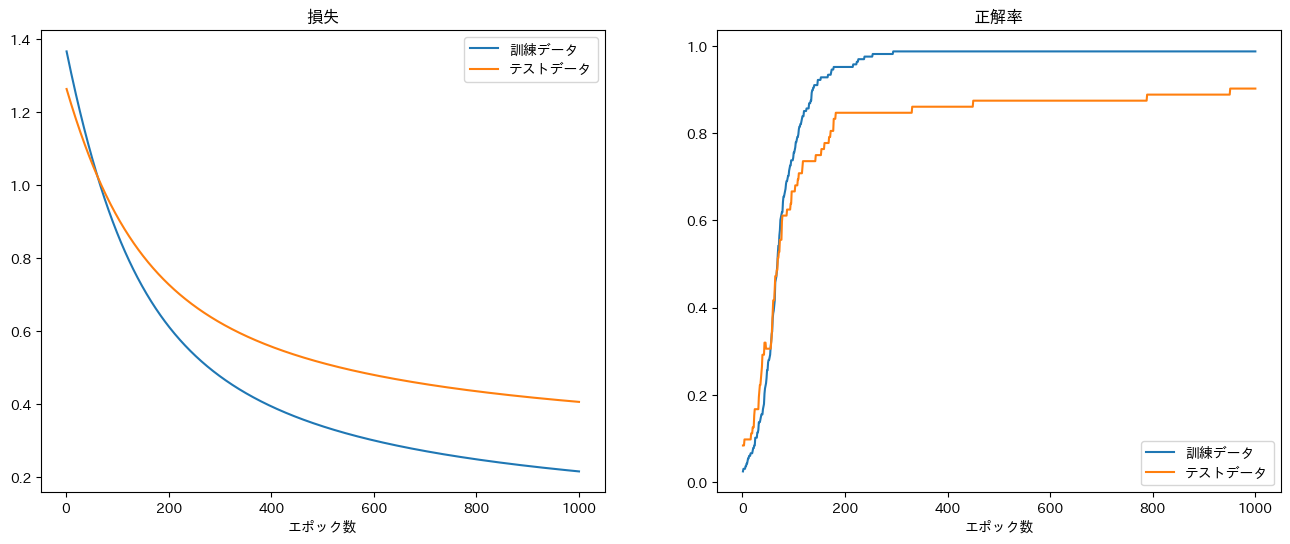

In [14]:
import matplotlib.pyplot as plt
import japanize_matplotlib

h=history.history
train_loss=h['loss'] # 履歴から訓練データの損失を取得
test_loss=h['val_loss'] # 履歴からテストデータの損失を取得
train_acc=h['accuracy'] # 履歴から訓練データの正解率を取得
test_acc=h['val_accuracy'] # 履歴からテストデータの正解率を取得

plt.figure(figsize=(16,6)) # グラフ全体のサイズを指定
xs=np.arange(1,len(train_loss)+1) # グラフの横軸の値を生成

# 損失のプロット
plt.subplot(1,2,1) # 1行2列の配置において1番目のセルにグラフを描画する
plt.plot(xs,train_loss,label='訓練データ')
plt.plot(xs,test_loss,label='テストデータ')
plt.title('損失')
plt.xlabel('エポック数')
plt.legend()

# 正解率のプロット
plt.subplot(1,2,2) # 1行2列の配置において2番目のセルにグラフを描画する
plt.plot(xs,train_acc,label='訓練データ')
plt.plot(xs,test_acc,label='テストデータ')
plt.title('正解率')
plt.xlabel('エポック数')
plt.legend()

plt.show() # グラフを表示する

# 実習6.10：訓練データに対する予測性能の評価

混同行列
[[58  0  0]
 [ 2 54  0]
 [ 0  0 54]]
正解率: 0.9880952380952381
精度: [0.96666667 1.         1.        ]
再現率: [1.         0.96428571 1.        ]


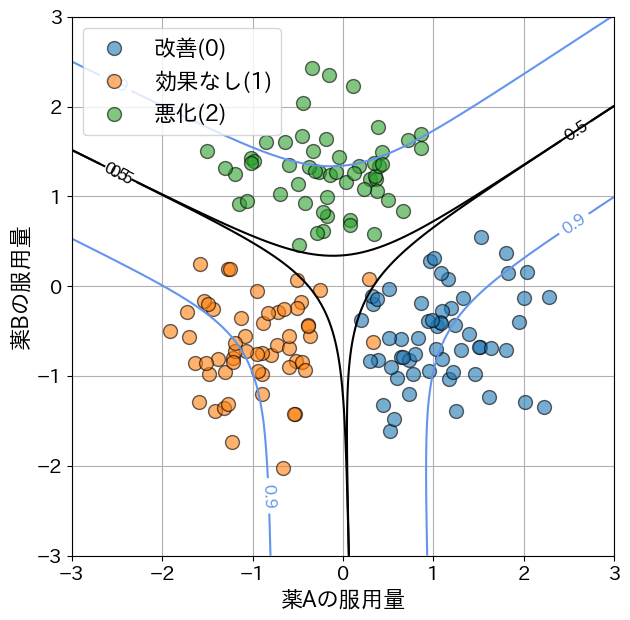

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# 訓練データに対する予測。verbose=0：進捗表示をオフにする
y_pred=model.predict(z_train,verbose=0)

# 各データについて、条件付き確率が最大のラベルを取得
c_pred=np.argmax(y_pred,axis=1)

# one-hotベクトルをクラスラベルに戻す
y_train2=np.argmax(y_train,axis=1)

# 混同行列の計算
cm=confusion_matrix(y_train2,c_pred)
print('混同行列')
print(cm)

train_a=accuracy_score(y_train2,c_pred)
print('正解率:', train_a)

# 精度を計算
train_p=precision_score(y_train2,c_pred,average=None)
print('精度:', train_p)

# 再現率を計算
train_r=recall_score(y_train2,c_pred,average=None)
print('再現率:', train_r)

# データ分布と決定境界を可視化
show_decision_border(model,z_train,y_train2)

# 実習6.11：テストデータによる汎化能力の推定

混同行列
[[19  1  2]
 [ 2 22  0]
 [ 1  1 24]]
正解率: 0.9027777777777778
精度: [0.86363636 0.91666667 0.92307692]
再現率: [0.86363636 0.91666667 0.92307692]


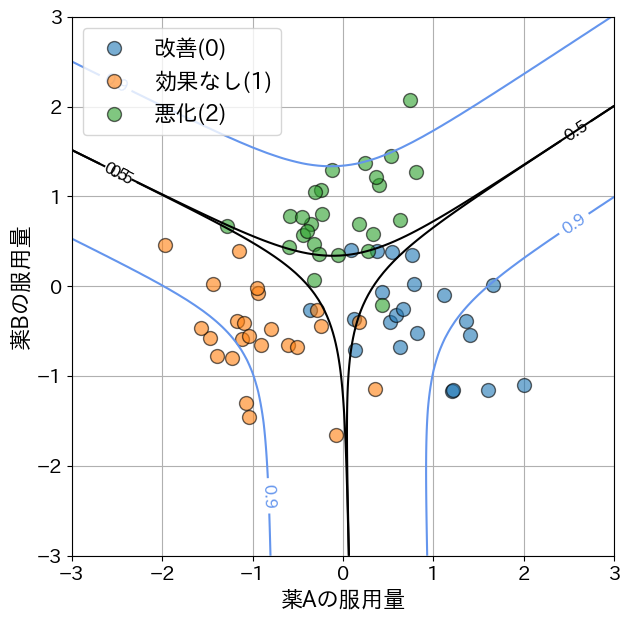

In [16]:
# テストデータに対する予測。verbose=0：進捗表示をオフにする
y_pred=model.predict(z_test,verbose=0)

# 各データについて、条件付き確率が最大のラベルを取得
c_pred=np.argmax(y_pred,axis=1)

# one-hotベクトルをクラスラベルに戻す
y_test2=np.argmax(y_test,axis=1)

# 混同行列の計算
cm=confusion_matrix(y_test2,c_pred)
print('混同行列')
print(cm)

test_a=accuracy_score(y_test2,c_pred)
print('正解率:', test_a)

# 精度を計算
test_p=precision_score(y_test2,c_pred,average=None)
print('精度:', test_p)

# 再現率を計算
test_r=recall_score(y_test2,c_pred,average=None)
print('再現率:', test_r)

# データ分布と決定境界を可視化
show_decision_border(model,z_test,y_test2)